In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

In [2]:
df = pd.read_csv("./dataset/Mental health Depression disorder Data.csv", index_col="index")
df.head()

C:\Users\augus\AppData\Local\Temp\ipykernel_8224\1168623904.py:1: DtypeWarning: Columns (5,6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv("./dataset/Mental health Depression disorder Data.csv", index_col="index")


,Entity,Code,Year,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
index,,,,,,,,,,
0,Afghanistan,AFG,1990,0.16056,0.697779,0.101855,4.828830,1.677082,4.071831,0.672404
1,Afghanistan,AFG,1991,0.160312,0.697961,0.099313,4.829740,1.684746,4.079531,0.671768
2,Afghanistan,AFG,1992,0.160135,0.698107,0.096692,4.831108,1.694334,4.088358,0.670644
3,Afghanistan,AFG,1993,0.160037,0.698257,0.094336,4.830864,1.705320,4.096190,0.669738
4,Afghanistan,AFG,1994,0.160022,0.698469,0.092439,4.829423,1.716069,4.099582,0.669260


In [3]:
df.describe()

,Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,6468.000000,6468.000000,6468.000000,6468.000000
mean,3.989921,0.862278,3.497654,1.585821
std,1.167526,0.460679,0.655859,0.860283
min,2.023393,0.383650,2.139903,0.446940
25%,3.188824,0.535064,3.005529,0.993685
50%,3.554373,0.726430,3.499606,1.479936
75%,4.682163,0.940157,3.912381,1.867834
max,8.967330,3.452476,6.602754,5.474668


In [4]:
df.dtypes

Entity                        object
Code                          object
Year                          object
Schizophrenia (%)             object
Bipolar disorder (%)          object
Eating disorders (%)          object
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [5]:
for column in df.columns:
    df.drop(df[df[column].isna()].index, inplace=True)
    df.reset_index(drop=True, inplace=True)

In [6]:
df[["Schizophrenia (%)", "Bipolar disorder (%)", "Eating disorders (%)"]] = df[["Schizophrenia (%)", "Bipolar disorder (%)", "Eating disorders (%)"]].astype(float)
df.dtypes

Entity                        object
Code                          object
Year                          object
Schizophrenia (%)            float64
Bipolar disorder (%)         float64
Eating disorders (%)         float64
Anxiety disorders (%)        float64
Drug use disorders (%)       float64
Depression (%)               float64
Alcohol use disorders (%)    float64
dtype: object

In [7]:
df.describe()

,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
count,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000,5488.000000
mean,0.208183,0.716884,0.234023,3.946979,0.833328,3.474504,1.562273
std,0.041998,0.164246,0.154147,1.134810,0.441199,0.671741,0.861973
min,0.146902,0.314535,0.073908,2.023393,0.383650,2.139903,0.446940
25%,0.179452,0.615732,0.121761,3.178912,0.524018,2.955355,0.961545
50%,0.198510,0.693954,0.180378,3.515140,0.709090,3.461421,1.466906
75%,0.230553,0.830217,0.278681,4.659540,0.906843,3.877343,1.853683
max,0.375110,1.206597,0.943991,8.967330,3.452476,6.602754,5.474668


In [8]:
df.mean().sort_values()

C:\Users\augus\AppData\Local\Temp\ipykernel_8224\4016324151.py:1: FutureWarning: The default value of numeric_only in DataFrame.mean is deprecated. In a future version, it will default to False. In addition, specifying 'numeric_only=None' is deprecated. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.mean().sort_values()


Schizophrenia (%)            0.208183
Eating disorders (%)         0.234023
Bipolar disorder (%)         0.716884
Drug use disorders (%)       0.833328
Alcohol use disorders (%)    1.562273
Depression (%)               3.474504
Anxiety disorders (%)        3.946979
Year                              inf
dtype: float64

In [9]:
df.drop(df[df["Entity"] == "World"].index, inplace=True)
df.reset_index(drop=True, inplace=True)

In [10]:
df_entity_mean = df.groupby(["Entity"]).mean().reset_index(names=["Entity"])
df_entity_mean

C:\Users\augus\AppData\Local\Temp\ipykernel_8224\849922402.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df_entity_mean = df.groupby(["Entity"]).mean().reset_index(names=["Entity"])


,Entity,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,0.162974,0.702354,0.094261,4.848102,2.120798,4.118622,0.663151
1,Albania,0.196544,0.700091,0.145230,3.368903,0.498765,2.190442,1.746757
2,Algeria,0.194960,0.809903,0.194488,5.011396,1.540640,3.657743,0.653712
3,American Samoa,0.249785,0.467095,0.181259,3.293312,0.759355,2.940850,1.135266
4,Andorra,0.264492,0.964324,0.621480,5.279751,0.885044,3.739451,1.224082
...,...,...,...,...,...,...,...,...
190,Venezuela,0.203974,0.775802,0.272117,2.856071,0.615339,2.802217,1.353729
191,Vietnam,0.233554,0.545323,0.102642,2.035264,0.648821,2.910582,1.597560
192,Yemen,0.171712,0.733302,0.129697,4.833025,1.243692,4.004947,0.631849
193,Zambia,0.160916,0.602382,0.123559,3.560979,0.510522,3.553940,1.639368


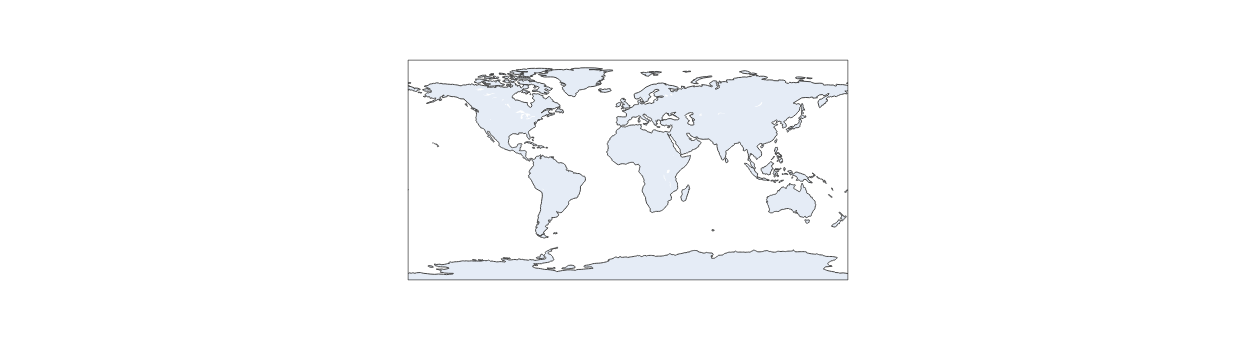

In [13]:
fig = px.choropleth(df_entity_mean, geojson="Entity",
                           color_continuous_scale="Viridis",
                           range_color=(0, 12),
                           labels={
                               'Schizophrenia':'Schizophrenia (%)', 
                           }
                          )

fig.show()

In [129]:
a = df.groupby(["Entity"]).mean()

C:\Users\augus\AppData\Local\Temp\ipykernel_16932\1539269742.py:1: FutureWarning:

The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.



In [139]:
a.

,Entity,Schizophrenia (%),Bipolar disorder (%),Eating disorders (%),Anxiety disorders (%),Drug use disorders (%),Depression (%),Alcohol use disorders (%)
0,Afghanistan,0.162974,0.702354,0.094261,4.848102,2.120798,4.118622,0.663151
1,Albania,0.196544,0.700091,0.145230,3.368903,0.498765,2.190442,1.746757
2,Algeria,0.194960,0.809903,0.194488,5.011396,1.540640,3.657743,0.653712
3,American Samoa,0.249785,0.467095,0.181259,3.293312,0.759355,2.940850,1.135266
4,Andorra,0.264492,0.964324,0.621480,5.279751,0.885044,3.739451,1.224082
...,...,...,...,...,...,...,...,...
190,Venezuela,0.203974,0.775802,0.272117,2.856071,0.615339,2.802217,1.353729
191,Vietnam,0.233554,0.545323,0.102642,2.035264,0.648821,2.910582,1.597560
192,Yemen,0.171712,0.733302,0.129697,4.833025,1.243692,4.004947,0.631849
193,Zambia,0.160916,0.602382,0.123559,3.560979,0.510522,3.553940,1.639368
